## Employee Retention

Understand why and when employees are most likely to leave so companies can take actions to improve employee retention and planning new hiring in advance. (It's called people anlytics)

Goal: prediction employee retention and understand main drivers. 

In [1]:
import scipy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl
# print(plt.style.available)
plt.style.use('ggplot')
import seaborn as sns

# plt.rc('figure', figsize=(20, 20))
%matplotlib inline
# https://matplotlib.org/users/style_sheets.html

# Fixing random state for reproducibility
np.random.seed(1)


### Load and Preprocess

In [2]:
# load data 
data = pd.read_csv('data/employee_retention_data.csv')
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null object
quit_date      13510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [4]:
data.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [5]:
data['dept'].unique()

array(['customer_service', 'marketing', 'data_science', 'engineer',
       'sales', 'design'], dtype=object)

In [6]:
# data type 
data['dept'] = data['dept'].astype('category')
data['join_date'] = pd.to_datetime(data['join_date'])
data['quit_date'] = pd.to_datetime(data['quit_date'])

In [7]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


#### Create table and plots for headcount by date of each company

Table with column `date`, `company_id`, and `headcount`.

In [8]:
min(data['join_date'])

Timestamp('2011-01-24 00:00:00')

In [9]:
max(data['join_date'])

Timestamp('2015-12-10 00:00:00')

In [10]:
min(data['quit_date'])

Timestamp('2011-10-13 00:00:00')

In [11]:
max(data['quit_date'])

Timestamp('2015-12-09 00:00:00')

In [12]:
sorted(data['company_id'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [13]:
pd.Series(sorted(data['company_id'].unique()))

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
dtype: int64

In [14]:
# create date time series 
dates = pd.date_range('2011-01-24', '2015-12-09', freq = 'D')

headcount = pd.DataFrame()
headcount['date'] = pd.to_datetime(dates)
headcount['temp'] = 1 
unique_companies = pd.DataFrame(sorted(data['company_id'].unique()), columns = ['company_id'])
unique_companies['temp'] = 1 
headcount = pd.merge(headcount, unique_companies, how = 'outer', on = 'temp')
headcount = headcount.drop(['temp'], axis = 1)
headcount.head()

,date,company_id
0,2011-01-24,1
1,2011-01-24,2
2,2011-01-24,3
3,2011-01-24,4
4,2011-01-24,5


In [15]:
joins = data.groupby(['join_date', 'company_id'])['dept'].count().reset_index()
# sns.barplot(x = 'conversion', y = 'country', hue = 'test', data = g, orient = 'h')
joins.rename(columns = {'dept': 'join_count'}, inplace = True)
joins.head()

,join_date,company_id,join_count
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5


In [16]:
quits = data.groupby(['quit_date', 'company_id'])['dept'].count().reset_index()
quits.rename(columns = {'dept': 'quit_count'}, inplace = True)
quits.head()

,quit_date,company_id,quit_count
0,2011-10-13,6,1
1,2011-10-14,10,1
2,2011-10-21,1,1
3,2011-10-28,4,1
4,2011-11-11,1,1


In [17]:
# merge 
headcount = pd.merge(headcount, joins, left_on = ['date', 'company_id'], 
                     right_on = ['join_date', 'company_id']).drop('join_date', axis = 1)
headcount = pd.merge(headcount, quits, left_on = ['date', 'company_id'], 
                     right_on = ['quit_date', 'company_id']).drop('quit_date', axis = 1)
headcount.head()

,date,company_id,join_count,quit_count
0,2011-11-22,1,1,1
1,2011-11-25,2,1,1
2,2011-12-13,2,2,1
3,2012-01-03,1,40,1
4,2012-01-03,2,16,1


In [18]:
headcount['headcount'] = headcount['join_count'].cumsum(axis = 0) - headcount['quit_count'].cumsum(axis = 0)
headcount = headcount.drop(['join_count', 'quit_count'], axis = 1)
headcount.head()

,date,company_id,headcount
0,2011-11-22,1,0
1,2011-11-25,2,0
2,2011-12-13,2,1
3,2012-01-03,1,40
4,2012-01-03,2,55


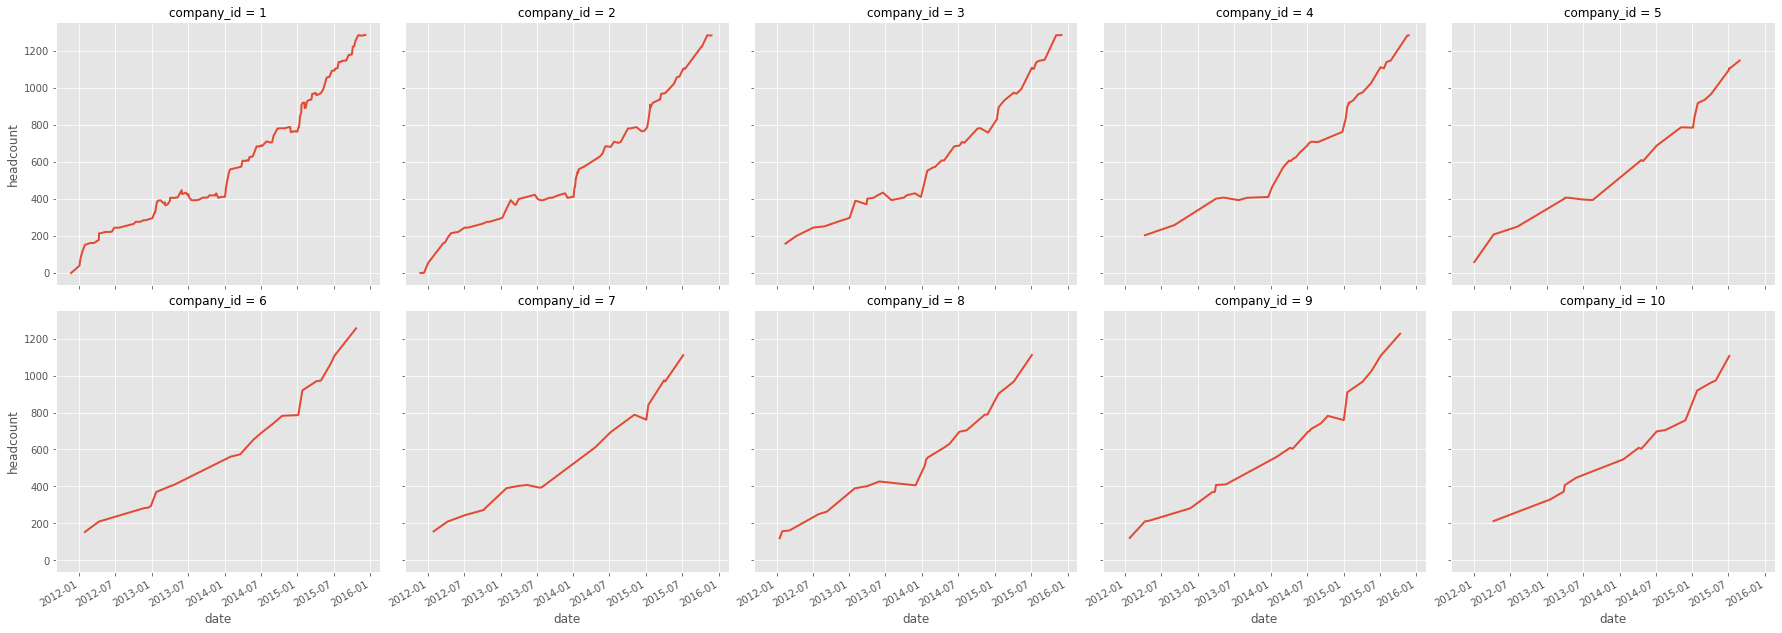

In [20]:
# visualize 
g = sns.relplot(x = 'date', y = 'headcount', col = 'company_id', col_wrap = 5, linewidth = 2,
                kind = 'line', data = headcount)

g.fig.autofmt_xdate()

### Understand Employee Retention: Feature Engineering 

* Check employment length distribution 

* Check week/day of year of quit dates to understand possible seasonality patterns 


In [22]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [55]:
# employment length 
# convert timedelta data to int days
data['employment_length'] = (data['quit_date'] - data['join_date']).dt.days
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employment_length
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0


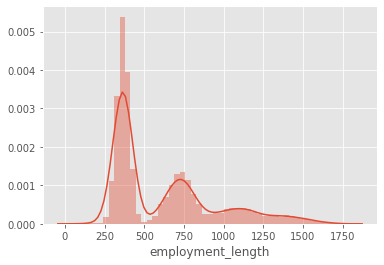

In [58]:
# distribution 
sns.distplot(data['employment_length'].dropna())

#### Peaks happen around each work anniversary. 

In [60]:
data['week_of_a_year'] = data['quit_date'].dt.week
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employment_length,week_of_a_year
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0,44.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0,14.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaN,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0,23.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0,34.0


In [93]:
g = data.groupby('week_of_a_year')['dept'].count()
g.head()

week_of_a_year
1.0    238
2.0    243
3.0    276
4.0    255
5.0    259
Name: dept, dtype: int64

In [77]:
g.values

array([238, 243, 276, 255, 259, 251, 214, 231, 265, 274, 244, 238, 209,
       199, 363, 153, 346, 274, 285, 256, 242, 262, 258, 253, 246, 278,
        89, 400, 270, 252, 284, 262, 261, 260, 276, 236, 270, 275, 265,
       248, 300, 279, 307, 293, 310, 277, 313, 289, 292, 185, 193, 212])

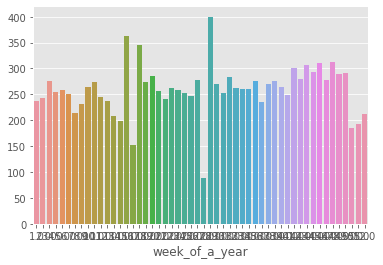

In [95]:
sns.barplot(x = g.index, y = g.values, orient = 'v')


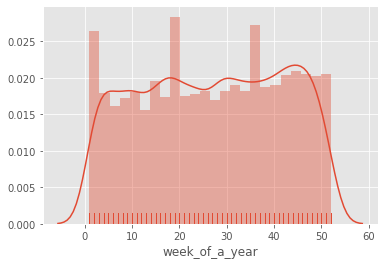

In [65]:
sns.distplot(data['week_of_a_year'].dropna(), hist = True, rug = True)